# Solution from Johannes Rieke and Alex Moore

In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1

### 1. Integration

In [2]:
from scipy.integrate import odeint

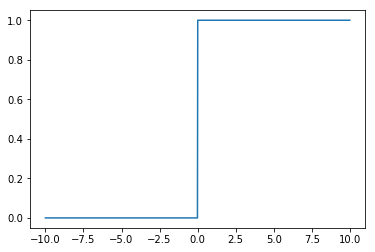

In [28]:
def step(x):
    return int(x >= 0)

x = np.linspace(-10, 10, 1000)
plt.plot(x, np.vectorize(step)(x))

In [4]:
def laing_chow(y, t, I1, I2, alpha=0.2, beta=0.4, phi=0.4, tau=20, g1=1, g2=2):
    u1, u2, a1, a2 = y
    du1 = -u1 + step(alpha * u1 * g1 - beta * u2 * g2 - a1 + I1)
    du2 = -u2 + step(alpha * u2 * g2 - beta * u1 * g1 - a2 + I2)
    da1 = 1 / tau * (-a1 + phi * step(alpha * u1 * g1 - beta * u2 * g2 - a1 + I1))
    da2 = 1 / tau * (-a2 + phi * step(alpha * u2 * g2 - beta * u1 * g1 - a2 + I2))
    return [du1, du2, da1, da2]
    

In [15]:
x0 = [1, 0, 0.1, 0.25]
t = np.linspace(0, 500, 100000)
I1 = 0.43
I2 = 0.5
u1, u2, a1, a2 = odeint(laing_chow, x0, t, args=(I1, I2)).T

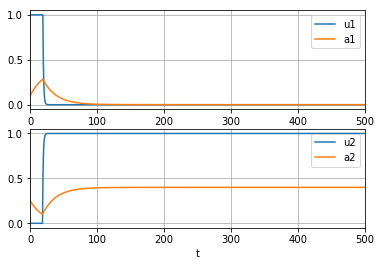

In [32]:
plt.subplot(211)
plt.plot(t, u1, label='u1')
plt.plot(t, a1, label='a1')
plt.grid()
plt.xlim(0, 500)
plt.legend()

plt.subplot(212)
plt.plot(t, u2, label='u2')
plt.plot(t, a2, label='a2')
plt.grid()
plt.xlim(0, 500)
plt.legend()
plt.xlabel('t')

### 2. Dominance duration

In [22]:
def dominance_durations(x1, x2, t):
    durations = []
    start = None
    for X1, X2, T in zip(x1, x2, t):
        if start is None and X1 > X2:
            start = T
        elif start is not None and X1 < X2:
            durations.append(T - start)
            start = None
    if start is not None:  # population 1 active at the end of the simulation
        durations.append(t[-1] - start)
    return durations

In [23]:
dominance_durations(u1, u2, t)

[19.34519345193452]